Anatomy of a function
----

The R function has the following structure

```R
name <- function(arg1, arg2, ...) {
    body_of_function
    return(value)
    }
```

A funciton is created using the `function` keywork, followed by a series of arguments in parentheses. The main work done by the function is enclosed witin curly braces, and a `return` function is used to indicate the output of the function. Finally we can assingn the funciton, just like any other R object, to a named vairable for later resue.

### Our first custom function

Let's write a function to calculate the mean of a vector of numbers.

In [1]:
my.mean <- function(xs) {
    n <- length(xs)
    return(sum(xs/n))
}

In [2]:
my.mean(1:10)

[1] 5.5

Work!
----

Write a function `my.sd` that takes a vector of numbers and returns their standard deviation as calculated from the follwoing formula
$$
\sqrt{\frac{\sum{(x - \bar{x})^2}}{n-1}}
$$
where $x$ is some vector of numbers, $\bar{x}$ is the mean of $x$ and $n$ is th number of elements in $x$. 

What is the standard deviation of `1:10`?

### Our second custom function

Let's be more ambitious - let's write a function that will generate a 4 parameter logistic function commonly used for fitting dose-response curves
```
((A-D)/(1+((x/C)^B))) + D
```
where $x$ is the input and $A$, $B$, $C$ and $D$ are the parameters that determine the shape of the curve:

- A = minimum asymptote
- B = Hill slope
- C = inflection point
- D = maximum asymptoteIn

In [81]:
log4 <- function(x, a, b, c, d) {
    return ((a-d)/(1 + ((x/c)^b)) + d)
}

In [82]:
x <- seq(0, 100, length.out = 51)

#### Arguments supplied by the user are matched by *position*

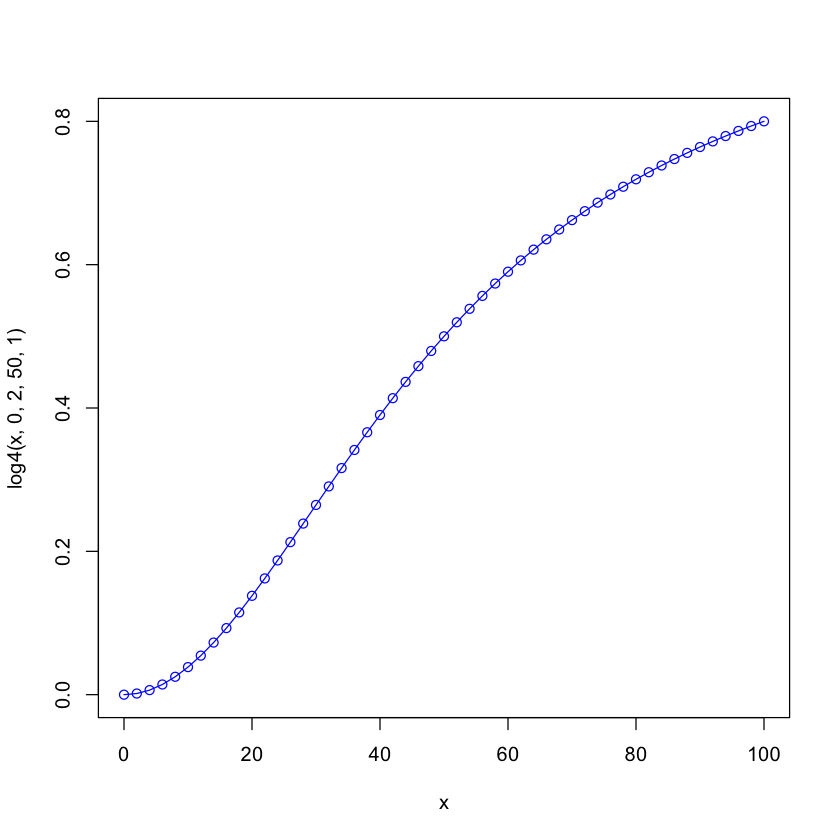

In [83]:
plot(x, log4(x, 0, 2, 50, 1), type="o", col="blue")

Default arguments
----

Perhaps we know that most of the time, the output will be normalized to fall between 0 and 1. In this case, we can set defatlt arguments for $A$ and $D$ to simplify the function call.

In [84]:
log4 <- function(x, a=0, b, c, d=1) {
    return ((a-d)/(1 + ((x/c)^b)) + d)
}

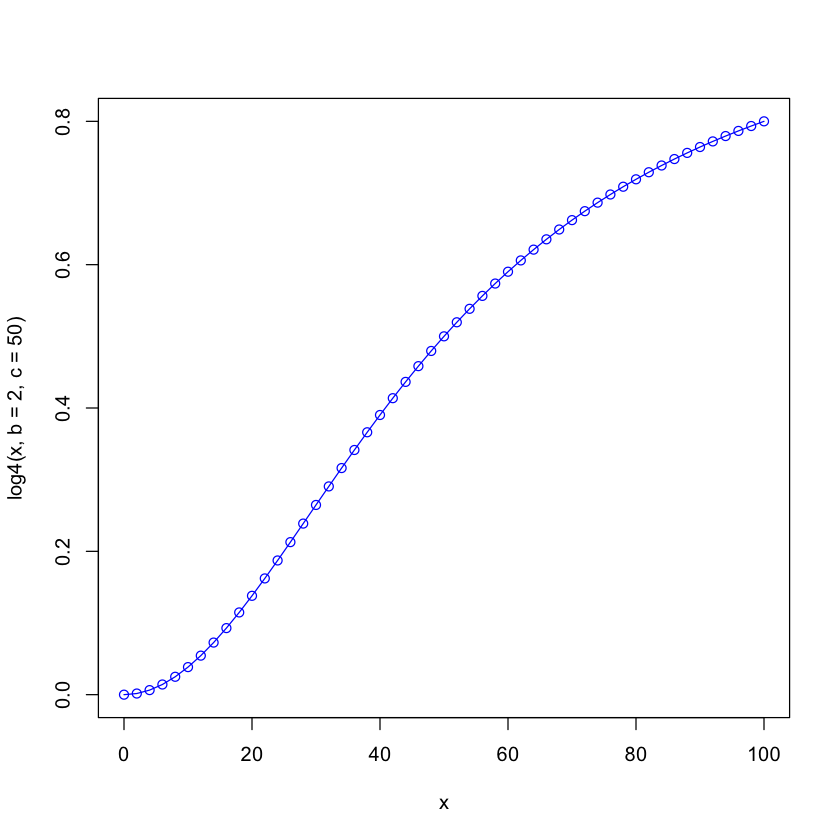

In [85]:
plot(x, log4(x, b=2, c=50), type="o", col="blue")

#### Note that we have to give *named* arguments otherwise R will assign the vlaues to the wrong parameter

In [86]:
plot(x, log4(x, 2, 50), type="l", col="blue")

ERROR: Error in log4(x, 2, 50): argument "c" is missing, with no default


#### In many cases, it makes sense to move arguments with default to the end of the parameter list. While we're at it, we also use more meaningful parameter names.

In [87]:
log4 <- function(x, slope, inflection, min=0, max=1 ) {
    return ((min-max)/(1 + ((x/inflection)^slope)) + max)
}

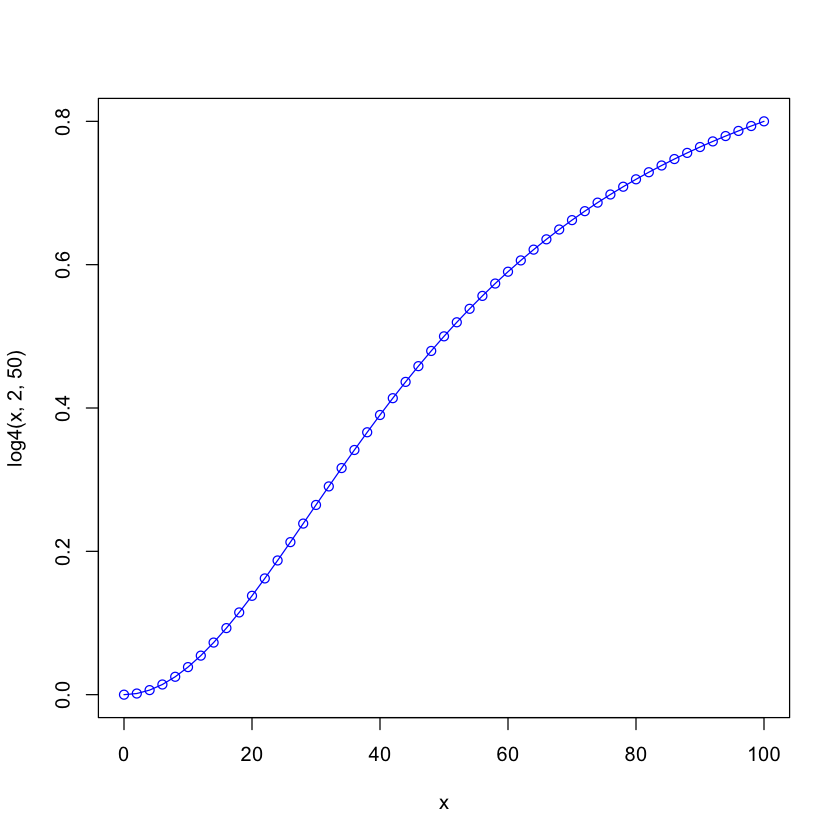

In [88]:
plot(x, log4(x, 2, 50), type="o", col="blue")

Work!
----

The 4 parameter logistic function always generates a symmetric curve. There is a 5 parameter lgoistic funciton that can generate asymmetrical curves:
```
A + (D/(1+(X/C)^B)^E)
```
where the new parameter $E$ controls the amount of asymmetry.

Write a function that will generate the new 5PL curve, giving a default value for $E$ so that when the default is used, the 5PL and 4PL functions are the same. Use meaningful parameter names instead of A, B, C, D and E.

Plot the 5 PL curve with the following values

- min = 0
- max = 1
- slope = 3
- inflection = 5
- assymetry = 2

for x between 0 and 10.



The EC50 for the 5PL is given by
```
C((2^(1/E) - 1)^(1/B))
```
    
Write a function to calculte the EC50 given $B$, $C$ and $E$.

Curve fitting
----

Suppose we have some experimental data that we want to fit to a 4PL function. The data is read in from a text file to an R dataframe. We will have much more discusion of data frames in subsequent lectures. For now, treat them as a convenient strucutre for storing tabular data.

In [121]:
df <- read.table("4PL_data.txt")

#### `with` makes the columns of the data frame appear as regular vectors

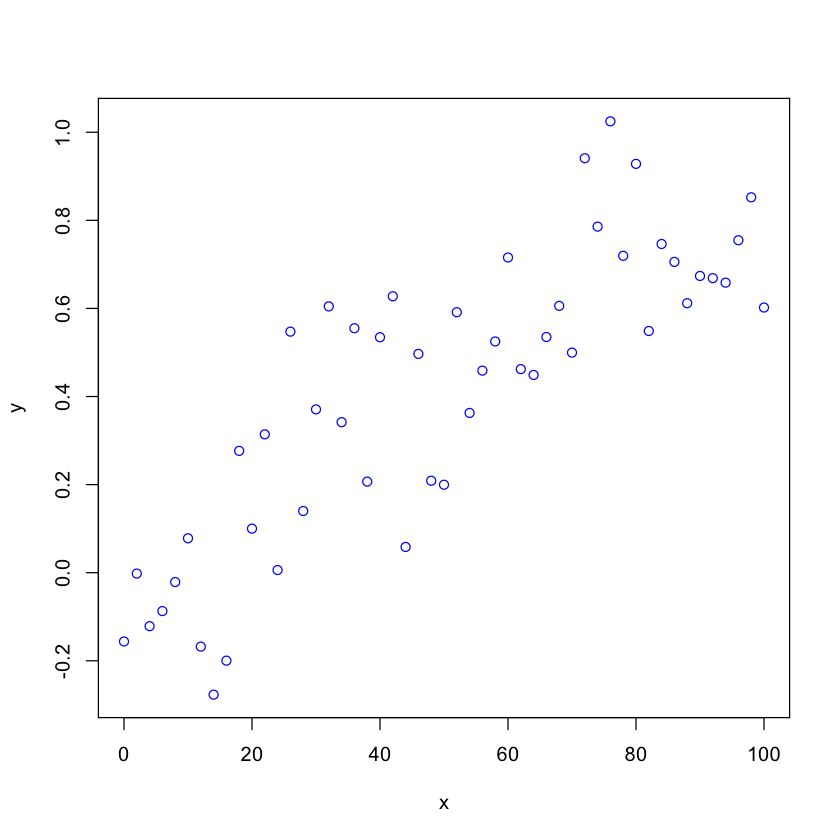

In [129]:
with(df,
    plot(x, y, type="p", col="blue")
     )

### Lets estimate the slope and inflection by nonlinear least squares minimization

In [130]:
with(df,
    fit <- nls(y ~ log4(x, slope, inflection), start=list(slope=1, inflection=30), data=df)
     )
summary(fit)


Formula: y ~ log4(x, slope, inflection)

Parameters:
           Estimate Std. Error t value Pr(>|t|)    
slope        1.8847     0.3138   6.006 2.29e-07 ***
inflection  52.5565     3.6068  14.572  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1786 on 49 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 3.286e-06


#### When there are many statmetns following the `with`, use curly braces to group them together as a single exprssion

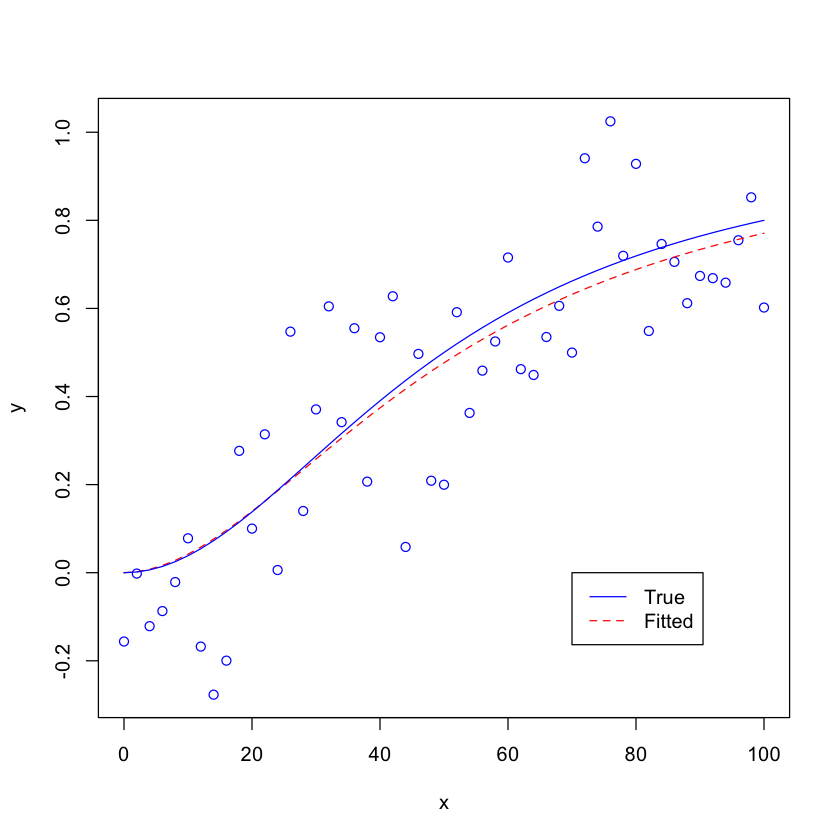

In [127]:
with(df, 
     {
         plot(x, y, 'p', col='blue')
         lines(x, predict(fit, x), col="red", lty=2)
         lines(x, log4(x, 2,50), col="blue")
         legend(70, 0, lty=1:2, col=c("blue", "red"), legend=c("True", "Fitted"))
     }
    )

Work!
----

Fit the smae data to the 5 PL and estimate the slope, inflection and asymmetry parameters. You may assume that min and max are 0 and 1 respectively and do not have to be estimated. Plot the curve and fitted values as in the example above.

What is the estimated ED50? You can use `fit$m$getPars()` to find the values of all fitted parameters.